In [7]:
import pickle

# Open the pickle file in binary mode
with open('sent_yelp_scores.pkl', 'rb') as file:
    # Load the object from the pickle file
    df = pickle.load(file)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134039 entries, 2021-03-18 to 2020-12-22
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   title           134039 non-null  object        
 1   clean_text      134039 non-null  object        
 2   sentiment_type  134039 non-null  object        
 3   prob_neg        134039 non-null  float64       
 4   prob_pos        134039 non-null  float64       
 5   year            134039 non-null  int32         
 6   month           134039 non-null  int32         
 7   date_formatted  134039 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), object(3)
memory usage: 8.2+ MB


In [9]:
df = df.sort_values('date_formatted',ascending=True)

In [10]:
df['year_month'] = df['date_formatted'].dt.strftime('%Y-%m')

In [11]:
df.head()

,title,clean_text,sentiment_type,prob_neg,prob_pos,year,month,date_formatted,year_month
date,,,,,,,,,
2020-01-01,Art meets artificial intelligence: Austin art...,"Some the works are still images, while others ...",Positive,0.189302,0.810698,2020,1,2020-01-01,2020-01
2020-01-01,10 Powerful Applications Of Artificial Intelli...,Powerful Applications Of Artificial Intellige...,Positive,0.003752,0.996248,2020,1,2020-01-01,2020-01
2020-01-01,‘Doomsday’ scenario of mass layoffs due to art...,Privacy Policy Terms & Conditions ‘Doomsday’ s...,Negative,0.995571,0.004429,2020,1,2020-01-01,2020-01
2020-01-01,'Doomsday' scenario of mass layoffs due to AI ...,Newly released documents show that top governm...,Negative,0.844282,0.155718,2020,1,2020-01-01,2020-01
2020-01-01,"Automation, AI continue to offer rich promises...",Automation and AI continued to log in multi-mi...,Negative,0.923271,0.076729,2020,1,2020-01-01,2020-01


In [12]:
df = df.drop(['year','month','date_formatted'],axis=1)

In [13]:
df.head(5)

,title,clean_text,sentiment_type,prob_neg,prob_pos,year_month
date,,,,,,
2020-01-01,Art meets artificial intelligence: Austin art...,"Some the works are still images, while others ...",Positive,0.189302,0.810698,2020-01
2020-01-01,10 Powerful Applications Of Artificial Intelli...,Powerful Applications Of Artificial Intellige...,Positive,0.003752,0.996248,2020-01
2020-01-01,‘Doomsday’ scenario of mass layoffs due to art...,Privacy Policy Terms & Conditions ‘Doomsday’ s...,Negative,0.995571,0.004429,2020-01
2020-01-01,'Doomsday' scenario of mass layoffs due to AI ...,Newly released documents show that top governm...,Negative,0.844282,0.155718,2020-01
2020-01-01,"Automation, AI continue to offer rich promises...",Automation and AI continued to log in multi-mi...,Negative,0.923271,0.076729,2020-01


In [14]:
df_p = df[df['sentiment_type']=='Positive']
df_p = df_p.groupby(['year_month','title','clean_text'], as_index=False)['prob_pos'].mean()

In [15]:
df_p.head()

,year_month,title,clean_text,prob_pos
0,2020-01,"\r \tInsilico, Pfizer to jointly explore novel...","Insilico, Pfizer to jointly explore novel data...",0.722864
1,2020-01,\r \tIsraeli data science platform co Iguazio ...,Israeli data science platform for real time ma...,0.794515
2,2020-01,\r \tStudy demonstrates accuracy of AI system ...,Study demonstrates accuracy of AI system in di...,0.527837
3,2020-01,\r \r \r Blow Molding: Online ...,Blow Molding: Online PET Preform Inspection Us...,0.642190
4,2020-01,\r Irish AI firm announces new collabo...,Registered in Ireland: . Everseen’s retail tec...,0.579075


In [16]:
len(df_p)

60888

In [17]:
df_n = df[df['sentiment_type']=='Negative']
df_n = df_n.groupby(['year_month','title','clean_text'], as_index=False)['prob_neg'].mean()

In [18]:
df_n.head()

,year_month,title,clean_text,prob_neg
0,2020-01,\r \t\t\tGoogle CEO calls for regulation of ar...,“There is no question in my mind that artifici...,0.989812
1,2020-01,\r \tCould AI beat humans in spotting breast t...,Could AI beat humans in spotting breast tumour...,0.999377
2,2020-01,\r \tIsrael Innovation Authority to help train...,"""In recent years, data science is taking over ...",0.999929
3,2020-01,\r \tNew AI system determines aggressiveness o...,New AI system determines aggressiveness of pro...,0.904190
4,2020-01,\r \tNew Mexico Community College Launching 10...,New Mexico Community College Launching -week D...,0.902643


In [19]:
len(df_n)

70401

In [20]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#
## Group by 'year_month' and calculate the average of 'prob_pos'
#df_grouped = df.groupby('year_month')['prob_pos'].mean().reset_index()
#
## Create the line plot
#plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
#sns.lineplot(data=df_grouped, x='year_month', y='prob_pos')
#plt.fill_between(df_grouped_pos['year_month'], df_grouped_pos['prob_pos'],color='blue',alpha=0.2)
#
## Customize the plot
#plt.xlabel('Year Month')
#plt.ylabel('Average Probability of Positive Sentiment')
#plt.title('Average Probability of Positive Sentiment Over Time')
#plt.ylim(0.35,0.7)
## Rotate x-axis labels for better visibility
#plt.xticks(rotation=45)  # Adjust the rotation angle as needed
#
## Show the plot
#plt.tight_layout()  # Adjust spacing if needed
#plt.show()

In [21]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#
#plt.figure(figsize=(12, 6)) 
#
#df_grouped_count = df.groupby('year_month')['title'].count().reset_index()
#
#sns.barplot(data=df_grouped_count, x='year_month', y='title', color='blue')
#plt.ylabel('Count of Titles')
#
## Rotate x-axis labels for better visibility
#plt.xticks(rotation=45)  # Adjust the rotation angle as needed
#
## Show the plot
#plt.tight_layout()  # Adjust spacing if needed
#plt.show()

In [22]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#
## Group by 'year_month' and calculate the average of 'prob_pos' and 'prob_neg'
#df_grouped_neg = df.groupby('year_month')['prob_neg'].mean().reset_index()
#df_grouped_pos = df.groupby('year_month')['prob_pos'].mean().reset_index()
#
## Create the line plot
#plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
#sns.lineplot(data=df_grouped_neg, x='year_month', y='prob_neg', color='orange')
#sns.lineplot(data=df_grouped_pos, x='year_month', y='prob_pos')
#
## Add the area plot
#plt.fill_between(df_grouped_pos['year_month'], df_grouped_neg['prob_neg'],color='orange',alpha=0.2)
#plt.fill_between(df_grouped_pos['year_month'], df_grouped_pos['prob_pos'],color='blue',alpha=0.2)
#
## Customize the plot
#plt.xlabel('Year Month')
#plt.ylabel('Average Probability of Sentiment')
#plt.title('Average Probability of Sentiment Over Time')
#plt.ylim(0.35,0.7)
## Rotate x-axis labels for better visibility
#plt.xticks(rotation=45)  # Adjust the rotation angle as needed
#
## Show the plot
#plt.tight_layout()  # Adjust spacing if needed
#plt.show()

### Positive Sentiment Articles vs Score

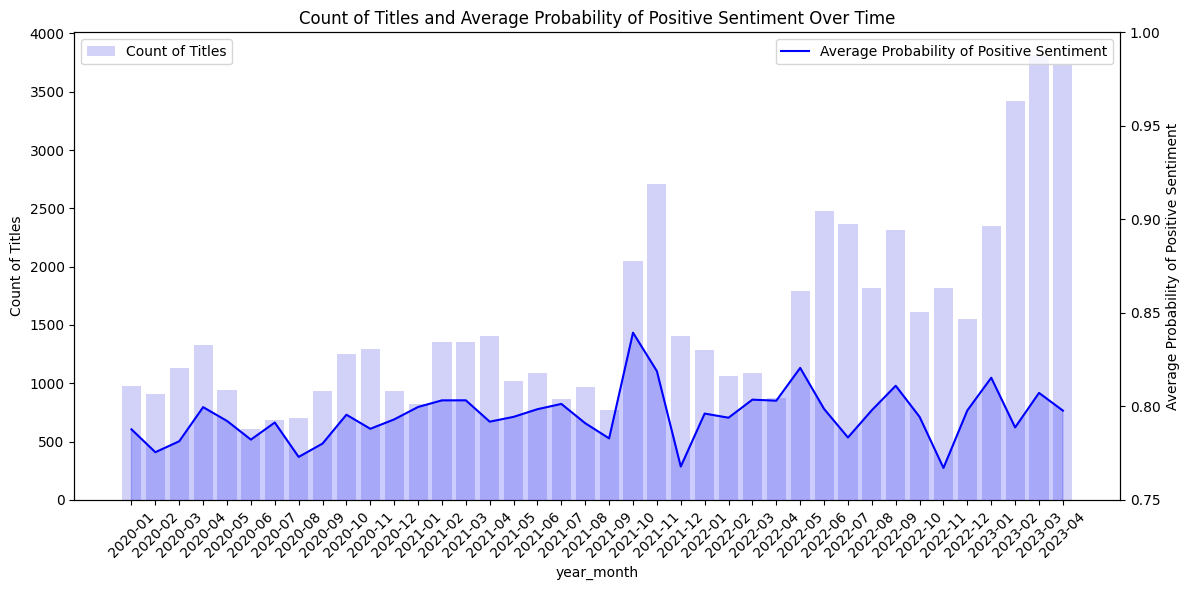

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_p

# Group by 'year_month' and calculate the count of titles
df_grouped_count = df.groupby('year_month')['title'].count().reset_index()

# Group by 'year_month' and calculate the average of 'prob_pos'
df_grouped_pos = df.groupby('year_month')['prob_pos'].mean().reset_index()

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the count of titles as a bar plot with legend
sns.barplot(data=df_grouped_count, x='year_month', y='title', color='blue', alpha=0.2, ax=ax1, label='Count of Titles')
ax1.set_ylabel('Count of Titles')

# Rotate x-axis labels for better visibility
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Create a second y-axis for the line plot
ax2 = ax1.twinx()

# Set the y-axis limits for the line plot
ax2.set_ylim(0.75, 1)

# Plot the average probability of positive sentiment as a line plot with legend
sns.lineplot(data=df_grouped_pos, x='year_month', y='prob_pos', color='blue', ax=ax2, label='Average Probability of Positive Sentiment')
ax2.fill_between(df_grouped_pos['year_month'], df_grouped_pos['prob_pos'], color='blue', alpha=0.2)
ax2.set_ylabel('Average Probability of Positive Sentiment')

# Add legend
ax1.legend(loc='upper left')

# Set the title
plt.title('Count of Titles and Average Probability of Positive Sentiment Over Time')

# Show the plot
plt.tight_layout()
plt.show()

In [43]:
df.head()

,year_month,title,clean_text,prob_pos,date,year
0,2020-01,"\r \tInsilico, Pfizer to jointly explore novel...","Insilico, Pfizer to jointly explore novel data...",0.722864,2020-01-01,2020
1,2020-01,\r \tIsraeli data science platform co Iguazio ...,Israeli data science platform for real time ma...,0.794515,2020-01-01,2020
2,2020-01,\r \tStudy demonstrates accuracy of AI system ...,Study demonstrates accuracy of AI system in di...,0.527837,2020-01-01,2020
3,2020-01,\r \r \r Blow Molding: Online ...,Blow Molding: Online PET Preform Inspection Us...,0.642190,2020-01-01,2020
4,2020-01,\r Irish AI firm announces new collabo...,Registered in Ireland: . Everseen’s retail tec...,0.579075,2020-01-01,2020


### Negative Sentiment Articles vs Score

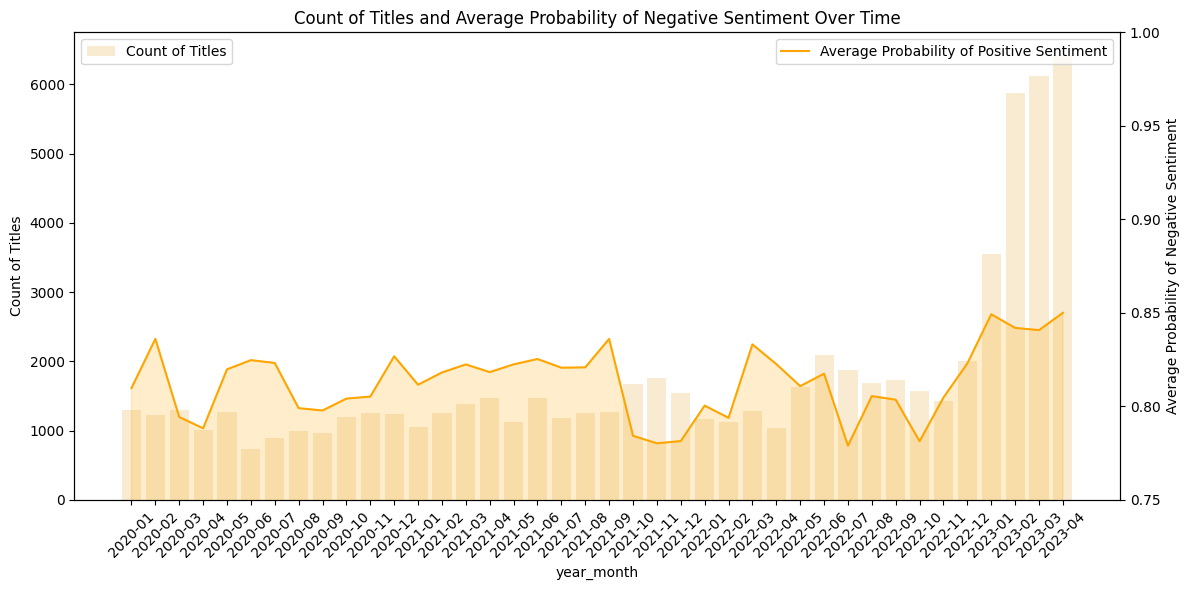

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_n

# Group by 'year_month' and calculate the count of titles
df_grouped_count = df.groupby('year_month')['title'].count().reset_index()

# Group by 'year_month' and calculate the average of 'prob_neg'
df_grouped_neg = df.groupby('year_month')['prob_neg'].mean().reset_index()

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the count of titles as a bar plot
sns.barplot(data=df_grouped_count, x='year_month', y='title', color='orange', alpha=0.2, ax=ax1, label='Count of Titles')
ax1.set_ylabel('Count of Titles')

# Rotate x-axis labels for better visibility
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Create a second y-axis for the line plot
ax2 = ax1.twinx()

# Set the y-axis limits for the line plot
ax2.set_ylim(0.75, 1)

# Plot the average probability of negative sentiment as a line plot
sns.lineplot(data=df_grouped_neg, x='year_month', y='prob_neg', color='orange', ax=ax2, label='Average Probability of Positive Sentiment')
ax2.fill_between(df_grouped_neg['year_month'], df_grouped_neg['prob_neg'], color='orange', alpha=0.2)
ax2.set_ylabel('Average Probability of Negative Sentiment')


# Add legend
ax1.legend(loc='upper left')

# Set the title
plt.title('Count of Titles and Average Probability of Negative Sentiment Over Time')

# Show the plot
plt.tight_layout()
plt.show()

In [45]:
df_grouped_count.head()

,year_month,title
0,2020-01,1292
1,2020-02,1227
2,2020-03,1293
3,2020-04,1002
4,2020-05,1275


In [46]:
df_p.head()

,year_month,title,clean_text,prob_pos,date,year
0,2020-01,"\r \tInsilico, Pfizer to jointly explore novel...","Insilico, Pfizer to jointly explore novel data...",0.722864,2020-01-01,2020
1,2020-01,\r \tIsraeli data science platform co Iguazio ...,Israeli data science platform for real time ma...,0.794515,2020-01-01,2020
2,2020-01,\r \tStudy demonstrates accuracy of AI system ...,Study demonstrates accuracy of AI system in di...,0.527837,2020-01-01,2020
3,2020-01,\r \r \r Blow Molding: Online ...,Blow Molding: Online PET Preform Inspection Us...,0.642190,2020-01-01,2020
4,2020-01,\r Irish AI firm announces new collabo...,Registered in Ireland: . Everseen’s retail tec...,0.579075,2020-01-01,2020


In [47]:
df_n.head()

,year_month,title,clean_text,prob_neg
0,2020-01,\r \t\t\tGoogle CEO calls for regulation of ar...,“There is no question in my mind that artifici...,0.989812
1,2020-01,\r \tCould AI beat humans in spotting breast t...,Could AI beat humans in spotting breast tumour...,0.999377
2,2020-01,\r \tIsrael Innovation Authority to help train...,"""In recent years, data science is taking over ...",0.999929
3,2020-01,\r \tNew AI system determines aggressiveness o...,New AI system determines aggressiveness of pro...,0.904190
4,2020-01,\r \tNew Mexico Community College Launching 10...,New Mexico Community College Launching -week D...,0.902643


In [53]:
len(df_n)

70401

In [56]:
len(df_p)

60888

In [49]:
import pandas as pd
import pickle

# Write the filtered_news dataframe to a pickle file
df_p.to_pickle('positive_sent_articles.pkl')

In [54]:
# Write the filtered_news dataframe to a parquet file
df_p.to_parquet('positive_sent_articles.parquet')

In [50]:
import pandas as pd
import pickle

# Write the filtered_news dataframe to a pickle file
df_n.to_pickle('negative_sent_articles.pkl')

In [59]:
# Write the filtered_news dataframe to a parquet file
df_n.to_parquet('negative_sent_articles.parquet')

### Now, by digging deeper into when the sentiment was highly positive and also highly negative

By performing LDA on the positively and negatively classified articles, I aim to understand the trends like correlation between the number of articles in a month and the overall positive/ negative sentiment int he respective time period

## Check the next notebook